# Acceptance rate scheme matches target rate

## ODE model

Let's start with an ODE model of a conversion reaction:

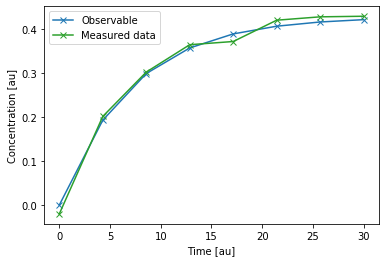

In [1]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=8)

# data
data = mv.get_model_noisy()(mv.p_true)

# plot it
mv.viz_data_and_sim(data)

In [2]:
print(mv.p_true)

{'p0': 0.06, 'p1': 0.08}


Now let's run it:

In [3]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
history_ode = abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_ode = abc.run(max_nr_populations=20)

INFO:History:Start <ABCSMC(id=103, start_time=2019-11-17 19:19:41.683004, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=9.5032e+00 for t=0.
INFO:ABC:t: 0, eps: 141.61414165575164.
DEBUG:Acceptor:Encountered pd=1.2051e+01 > c=9.5032e+00, thus weight=1.0182e+00.
DEBUG:Acceptor:Encountered pd=1.4570e+01 > c=9.5032e+00, thus weight=1.0364e+00.
DEBUG:Acceptor:Encountered pd=1.3380e+01 > c=9.5032e+00, thus weight=1.0278e+00.
DEBUG:Acceptor:Encountered pd=1.6547e+01 > c=9.5032e+00, thus weight=1.0510e+00.
INFO:ABC:Acceptance rate: 100 / 398 = 2.5126e-01, ESS=9.9995e+01.
DEBUG:Acceptor:pdf_norm=1.6547e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [47.78380729048981].
INFO:ABC:t: 1, eps: 47.78380729048981.
DEBUG:Acceptor:Encountered pd=2.2094e+01 > c=1.6547e+01, thus weight=1.1231e+00.
DEBUG:Acceptor:Encountered pd=2.0753e+01 > c=1.6547e+01, thus weight=1.0920e+00.
DEBUG:Acceptor:Encountered pd=1.8800e+01 > c=1.6547e+01, thus weight=1.0483e+00.
DEBUG:Accept

Some visualizations:

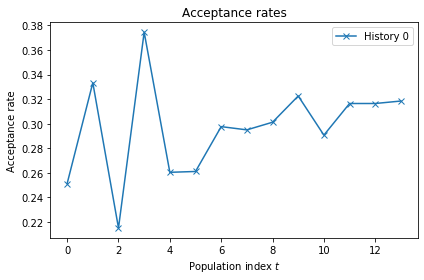

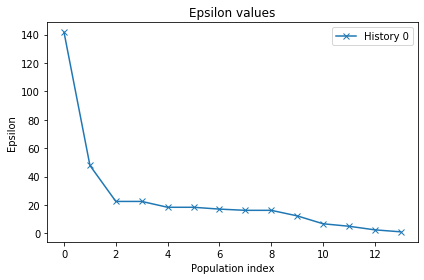

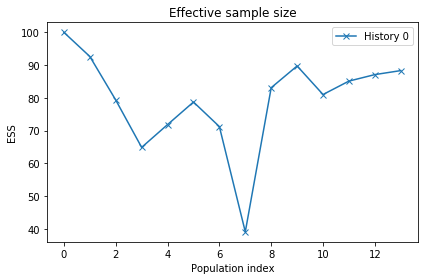

In [4]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_ode)
pyabc.visualization.plot_epsilons(history_ode)
pyabc.visualization.plot_effective_sample_sizes(history_ode)

## MJP model

Next, let's go for an MJP model of gene expression:

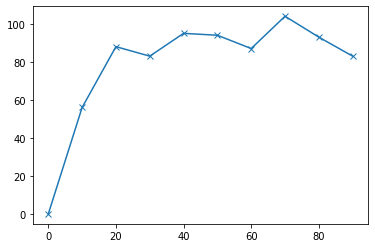

In [5]:
import pyabc
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

r

# model
mv = ModelVars(n_t=10)

# data
data = mv.get_model_noisy()(mv.p_true)

# plot
plt.plot(data['t'], data['mrna'], 'x-')

In [6]:
print(mv.p_true)

OrderedDict([('transcription', 10), ('decay', 0.1)])


In [8]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
history_mjp = abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_mjp = abc.run(max_nr_populations=8)

INFO:History:Start <ABCSMC(id=105, start_time=2019-11-17 19:21:24.050135, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-7.7780e+01 for t=0.
INFO:ABC:t: 0, eps: 2243.157233643036.
DEBUG:Acceptor:Encountered pd=-7.1796e+01 > c=-7.7780e+01, thus weight=1.0027e+00.
INFO:ABC:Acceptance rate: 100 / 346 = 2.8902e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=-7.7780e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [366.6134567640177].
INFO:ABC:t: 1, eps: 366.6134567640177.
DEBUG:Acceptor:Encountered pd=-5.9918e+01 > c=-7.7780e+01, thus weight=1.0499e+00.
DEBUG:Acceptor:Encountered pd=-4.9916e+01 > c=-7.7780e+01, thus weight=1.0790e+00.
DEBUG:Acceptor:Encountered pd=-7.3064e+01 > c=-7.7780e+01, thus weight=1.0129e+00.
DEBUG:Acceptor:Encountered pd=-6.4362e+01 > c=-7.7780e+01, thus weight=1.0373e+00.
DEBUG:Acceptor:Encountered pd=-6.7570e+01 > c=-7.7780e+01, thus weight=1.0282e+00.
DEBUG:Acceptor:Encountered pd=-7.4412e+01 > c=-7.7780e+01, thus weight=1.0092e+0

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/mrna_transcription.py", line 65, in model
    result = ssa_model.simulate(n_reps=1)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik

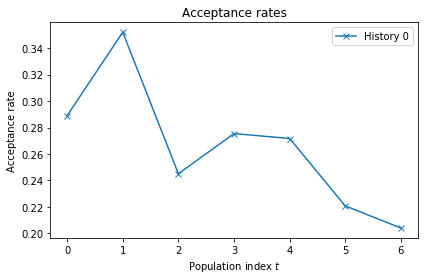

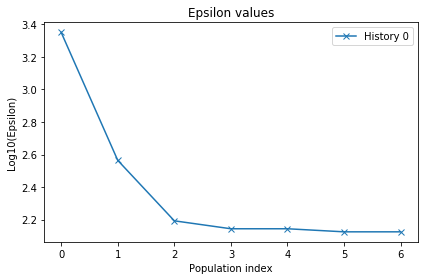

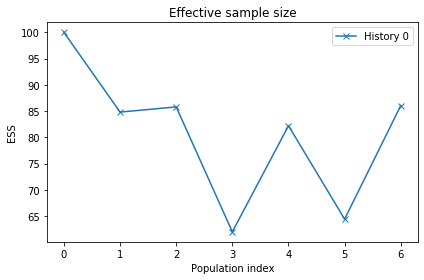

In [11]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_mjp)
pyabc.visualization.plot_epsilons(history_mjp, scale="log10")
pyabc.visualization.plot_effective_sample_sizes(history_mjp)

## SDE model

Next, we consider an SDE model of ion channel activation:

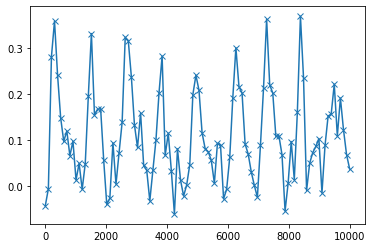

In [12]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=100)

# data
data = mv.get_model_noisy()(mv.p_true)

plt.plot(data['K'], 'x-')

In [13]:
print(mv.p_true)

{'dc': 20, 'membrane_dim': 10}


In [14]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
history_sde = abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_sde = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=106, start_time=2019-11-17 19:24:12.095911, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.4881e+02 for t=0.
INFO:ABC:t: 0, eps: 170.54012601323154.
DEBUG:Acceptor:Encountered pd=1.4974e+02 > c=1.4881e+02, thus weight=1.0054e+00.
DEBUG:Acceptor:Encountered pd=1.5164e+02 > c=1.4881e+02, thus weight=1.0167e+00.
DEBUG:Acceptor:Encountered pd=1.4979e+02 > c=1.4881e+02, thus weight=1.0057e+00.
INFO:ABC:Acceptance rate: 100 / 362 = 2.7624e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=1.5164e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [152.05190670985647].
INFO:ABC:t: 1, eps: 152.05190670985647.
INFO:ABC:Acceptance rate: 100 / 365 = 2.7397e-01, ESS=8.0473e+01.
DEBUG:Acceptor:pdf_norm=1.5164e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [149.21998144410702].
INFO:ABC:t: 2, eps: 149.21998144410702.
DEBUG:Acceptor:Encountered pd=1.5290e+02 > c=1.5164e+02, thus weight=1.0085e+00.
INFO:ABC:Acceptance rate: 100 / 335 = 2.9851

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 53, in model
    val = simulate(**p)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, 

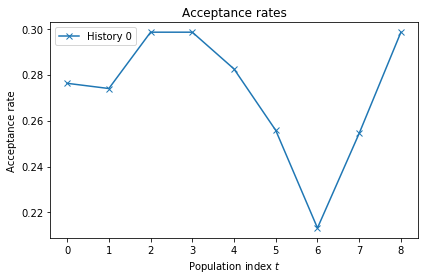

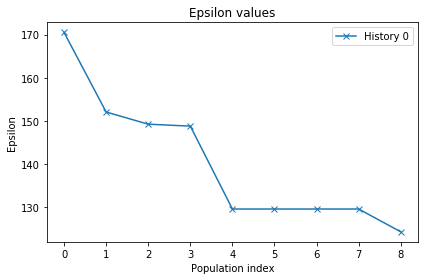

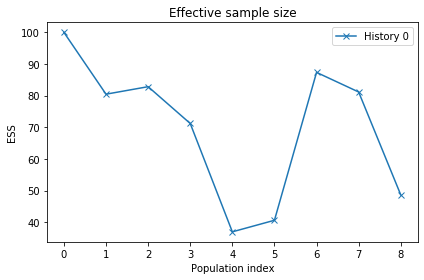

In [17]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_sde)
pyabc.visualization.plot_epsilons(history_sde)
pyabc.visualization.plot_effective_sample_sizes(history_sde)